<a href="https://colab.research.google.com/github/Susanna-Salata/goit-DS/blob/main/GOIT_Project_kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install tensorflow-gpu matplotlib opencv-python scikit-image scikit-learn

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
device_lib.list_local_devices()

Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 1000858398393102684,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 6920601600
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7792843317601029254
 physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1080, pci bus id: 0000:01:00.0, compute capability: 6.1"]

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
# import cv2
import random as rd
import skimage
from sklearn.metrics import confusion_matrix , classification_report

Extracting Data

In [ ]:
data_path = 'E:/data/goit_ds_project/'
IMG_SIZE = 32

In [ ]:
print(*glob.glob(data_path + '*'), sep='\n\n')

E:/data/goit_ds_project\ext

E:/data/goit_ds_project\saved_model

E:/data/goit_ds_project\test

E:/data/goit_ds_project\test.7z

E:/data/goit_ds_project\train

E:/data/goit_ds_project\train.7z

E:/data/goit_ds_project\trainLabels.csv


For extracting Data from .7z zip file we need to install py7zr package

In [ ]:
train_labels = pd.read_csv(data_path + 'trainLabels.csv')
train_labels

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [ ]:
LABELS = ['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship',
          'cat', 'dog', 'airplane']

Data Preprocessing

In [ ]:
from skimage import data, color
from skimage.io import imread
from skimage.transform import rescale, resize, downscale_local_mean

Take a Quick lookup at our data

In [ ]:
# Training parameters
BATCH_SIZE = 32
EPOCHS = 5
COLORS = 3

CNN-Arcitecture

In [ ]:
from tensorflow import keras
from keras.layers import Dense, Conv2D
from keras.layers import BatchNormalization, Flatten, Dropout, MaxPooling2D, UpSampling2D
from keras.layers import RandomFlip, RandomHeight, RandomCrop, RandomRotation, RandomZoom, RandomWidth
from keras import Sequential
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [ ]:
train_images_path =data_path + 'train/'
num_of_train_images = len(os.listdir(train_images_path))

train_images = [[]]*num_of_train_images

for filename in os.listdir(train_images_path):
    image_index = int(filename.split(".")[0])-1
    img = imread(os.path.join(train_images_path,filename)) 
    img = resize(img, (IMG_SIZE, IMG_SIZE, COLORS))
    train_images[image_index] = img

In [ ]:
train_images = np.asarray(train_images, dtype=float)/255

In [ ]:
LABELS = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6 ,'horse':7 ,'ship':8,'truck':9}
train_labels_ = [LABELS[i] for i in train_labels['label']]
train_labels_ = np.array(train_labels_)
train_labe_one_hot = to_categorical(train_labels_,10)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labe_one_hot, random_state=0, test_size=0.15)

In [ ]:
conv_base = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, COLORS))
# conv_base.summary()

In [ ]:
model = Sequential([
    UpSampling2D((2,2)),
    UpSampling2D((2,2)),
    UpSampling2D((2,2)),
    conv_base,
    Flatten(),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(10, activation='softmax')
    ])


Augmentation

In [ ]:
## Data augumentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True  # randomly flip images
)
datagen.fit(x_train)

Train the model

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=2e-5), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_data=(x_val, y_val))

Epoch 1/5
1329/1329 [==============================] - 613s 441ms/step - loss: 1.5688 - acc: 0.4858 - val_loss: 3.5614 - val_acc: 0.1037
Epoch 2/5
1329/1329 [==============================] - 586s 441ms/step - loss: 0.9053 - acc: 0.7411 - val_loss: 0.4423 - val_acc: 0.8920
Epoch 3/5
1329/1329 [==============================] - 586s 441ms/step - loss: 0.6505 - acc: 0.8363 - val_loss: 0.3228 - val_acc: 0.9172
Epoch 4/5
1329/1329 [==============================] - 586s 441ms/step - loss: 0.4880 - acc: 0.8893 - val_loss: 0.2867 - val_acc: 0.9269
Epoch 5/5
1329/1329 [==============================] - 586s 441ms/step - loss: 0.3747 - acc: 0.9253 - val_loss: 0.2542 - val_acc: 0.9315


In [ ]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=BATCH_SIZE),
                            steps_per_epoch=x_train.shape[0] // BATCH_SIZE,
                            epochs=EPOCHS * 2,
                            validation_data=(x_val, y_val))

C:\Users\4Andr\.conda\envs\tensorflow_gpu\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1328/1328 [==============================] - 627s 465ms/step - loss: 1.2394 - acc: 0.6412 - val_loss: 0.3292 - val_acc: 0.9020
Epoch 2/10
1328/1328 [==============================] - 620s 467ms/step - loss: 0.9604 - acc: 0.7163 - val_loss: 0.3634 - val_acc: 0.8916
Epoch 3/10
1328/1328 [==============================] - 620s 467ms/step - loss: 0.8735 - acc: 0.7464 - val_loss: 0.4070 - val_acc: 0.8785
Epoch 4/10
1328/1328 [==============================] - 620s 467ms/step - loss: 0.7991 - acc: 0.7696 - val_loss: 0.3315 - val_acc: 0.9001
Epoch 5/10
1328/1328 [==============================] - 620s 467ms/step - loss: 0.7481 - acc: 0.7866 - val_loss: 0.3501 - val_acc: 0.8961
Epoch 6/10
1328/1328 [==============================] - 619s 466ms/step - loss: 0.7073 - acc: 0.8002 - val_loss: 0.3497 - val_acc: 0.8920
Epoch 7/10
1328/1328 [==============================] - 620s 467ms/step - loss: 0.6669 - acc: 0.8108 - val_loss: 0.3058 - val_acc: 0.9048
Epoch 8/10
1328/1328 [============

Save model

In [ ]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save(data_path + 'saved_model/my_model_aug')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: E:/data/goit_ds_project/saved_model/my_model_aug\assets


C:\Users\4Andr\.conda\envs\tensorflow_gpu\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


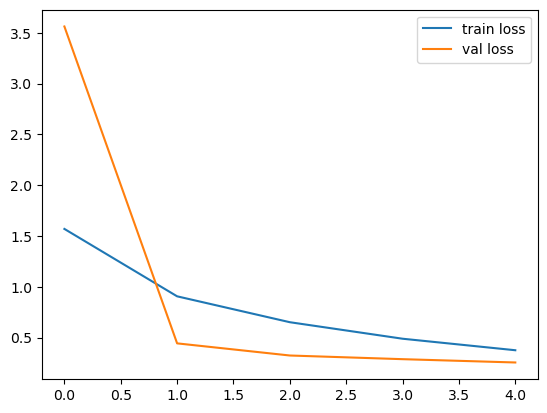

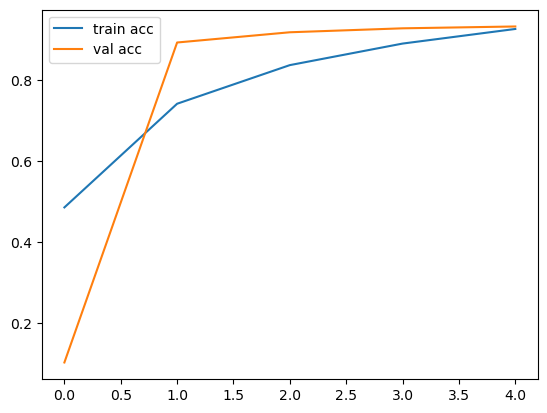

In [ ]:
r = history
import matplotlib.pyplot as plt

# plot the loss.\
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()

In [ ]:
result_dir = data_path + 'results'
if not os.path.exists(result_dir):
    os.mkdir(result_dir)

print('save the architecture of a model')
json_string = model.to_json()
open(os.path.join(result_dir,'cifar10_model.json'), 'w').write(json_string)
print('save weights')
model.save_weights(os.path.join(result_dir,'cifar10_model_weights.h5'))

save the architecture of a model
save weights


Evaluate

In [ ]:
predict_gen[0]

array([0.002631  , 0.00120336, 0.00433481, 0.03516679, 0.00405613,
       0.9390467 , 0.00213344, 0.00575396, 0.00126839, 0.00440547],
      dtype=float32)

In [ ]:
list(LABELS.keys())

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Load model to project

In [ ]:
ext_images_path = data_path + 'ext/'
num_of_train_images = len(os.listdir(ext_images_path))

ext_images = [[]]*num_of_train_images

image_index = 0
for filename in os.listdir(ext_images_path):
    img = imread(os.path.join(ext_images_path, filename))
    img = resize(img, (IMG_SIZE, IMG_SIZE, COLORS)) 
    ext_images[image_index] = img
    image_index +=1


# ext_images = np.asarray(ext_images, dtype=float)/255

In [ ]:
rev_labels = {val : key for key, val in LABELS.items()}

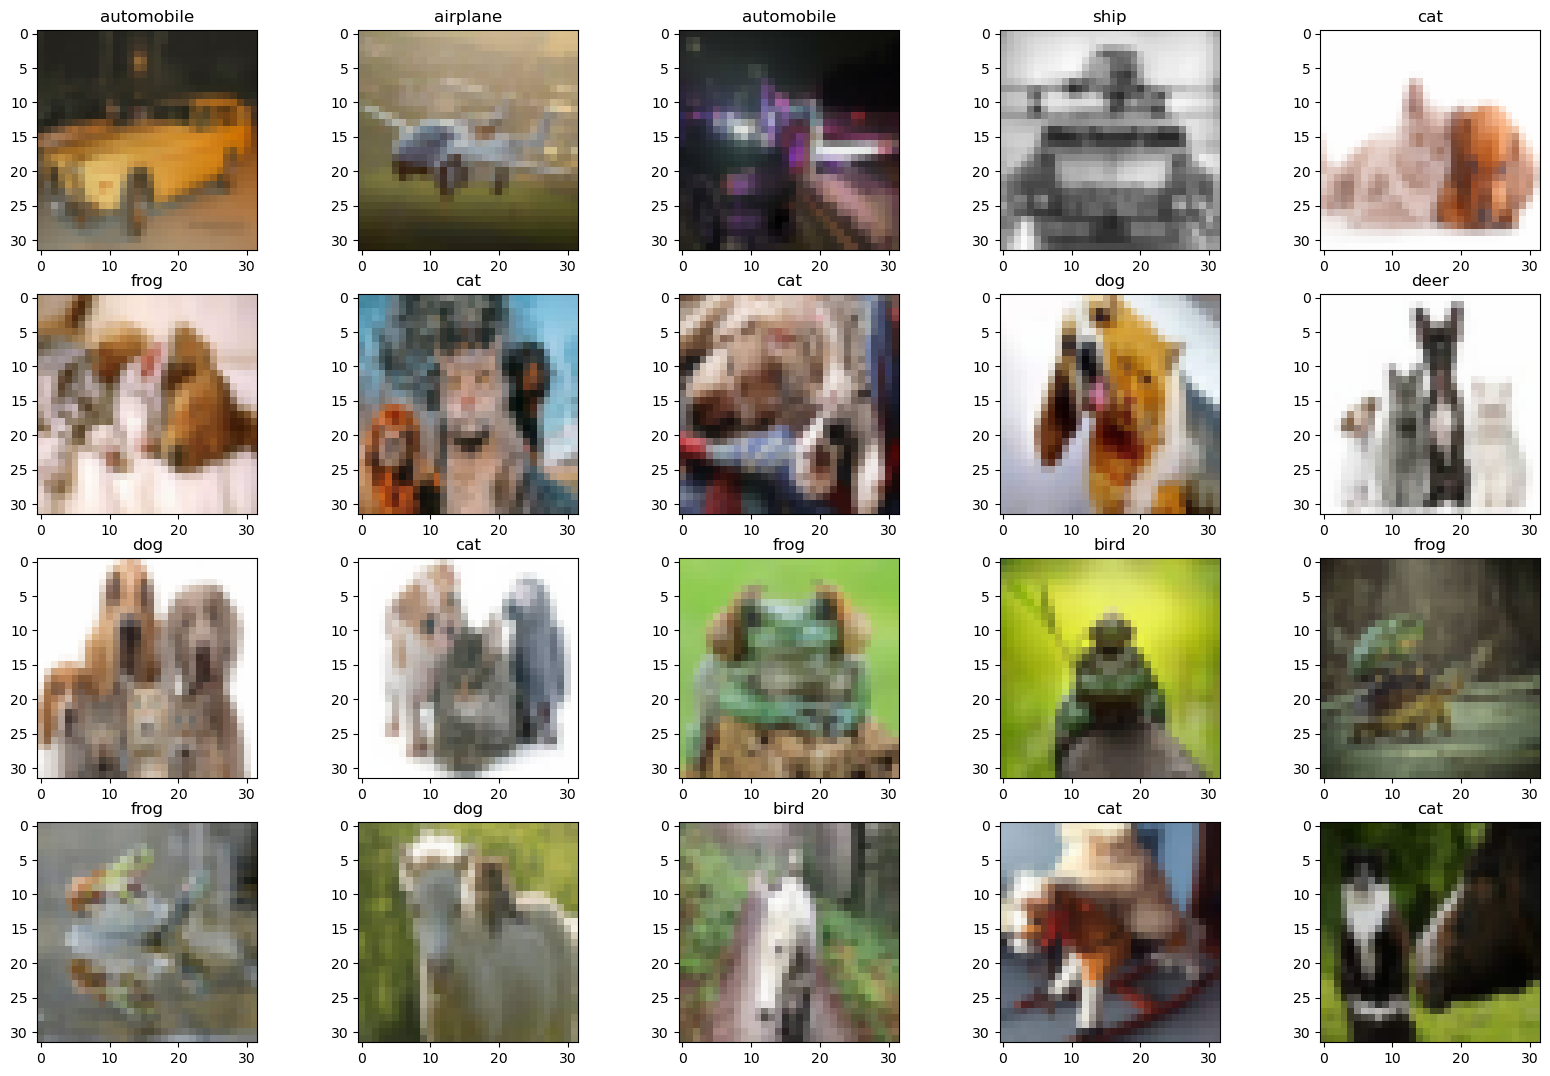

In [ ]:
plt.figure(figsize=(20,20))
for i in range(20):
    plt.subplot(6,5,i+1)
    plt.imshow(ext_images[i])
    img = ext_images[i]
    img = resize(img, (IMG_SIZE, IMG_SIZE, COLORS))
    img = np.expand_dims(img, axis=0)   
    img = np.asarray(img, dtype=float)/255 
    pred = model.predict(img)
    pred = np.argmax(pred, axis=1)
    plt.title(rev_labels[pred[0]])